<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>

Predicting yield helps the state to get an estimate of the crop in a
certain year to control the price rates.This model focuses on predicting the crop yield in advance by analyzing
factors like location, season, and crop type  through machine learning techniques on
previously collected datasets.

# **PRE-PROCESSING**


In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset

url = 'https://raw.githubusercontent.com/jdapoorv/Crop-yield-prediction/main/crop_csv_file_1_.csv'
crop_data = pd.read_csv(url)
crop_data


,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0
...,...,...,...,...,...,...,...,...,...,...
49994,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Small millets,36,35,45,27.0,7.0
49995,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Soyabean,37,40,46,27.0,32.0
49996,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Sunflower,36,41,50,450.0,213.0
49997,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Urad,37,42,55,1778.0,309.0


In [3]:
crop_data.shape

#rows X columns

(49999, 10)

In [4]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Temperature', 'Humidity', 'Soil_Moisture', 'Area', 'Production'],
      dtype='object')

In [5]:
# Statistical summary of data frame.

crop_data.describe()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.978400e+04
mean,2005.879138,34.445489,44.776116,53.110502,7363.389469,4.132019e+05
std,5.106092,3.498524,6.662406,5.258764,27927.935789,1.232609e+07
min,1997.000000,25.000000,35.000000,45.000000,0.200000,0.000000e+00
25%,2002.000000,34.000000,40.000000,50.000000,76.000000,8.700000e+01
50%,2006.000000,36.000000,42.000000,54.000000,436.000000,6.384400e+02
75%,2010.000000,36.000000,50.000000,55.000000,2546.500000,5.615000e+03
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,7.801620e+08


In [6]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Temperature,0
Humidity,0
Soil_Moisture,0
Area,0
Production,215


In [7]:
# Replacing missing values with mean of the production coloumn
crop_data['Production'] = crop_data['Production'].fillna(crop_data['Production'].mean())
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0
...,...,...,...,...,...,...,...,...,...,...
49994,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Small millets,36,35,45,27.0,7.0
49995,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Soyabean,37,40,46,27.0,32.0
49996,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Sunflower,36,41,50,450.0,213.0
49997,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Urad,37,42,55,1778.0,309.0


In [8]:
#checking
crop_data.isnull().values.any()

np.False_

In [9]:
# Displaying State Names present in the dataset
print(crop_data.State_Name.unique())
print('Total count of states and Union Territories:', len(crop_data.State_Name.unique()))


['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh']
Total count of states and Union Territories: 7


In [10]:
# Adding a new column Yield which indicates Production per unit Area.

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,34,45,52,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,34,55,62,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,35,50,59,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,25,55,55,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,36,35,45,40.0,169.0,4.225000


In [11]:
# Dropping unnecessary columns

data = crop_data.drop(['State_Name'], axis = 1)

In [12]:
dummy = pd.get_dummies(data)
dummy.corr()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield,District_Name_ANANTAPUR,District_Name_ANJAW,District_Name_ARARIA,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
Crop_Year,1.000000,0.000505,-0.001339,-0.001533,0.000842,0.007962,0.015756,0.011015,0.026680,-0.023607,...,0.000962,-0.005183,0.040199,-0.012186,0.029148,-0.017840,-0.006046,-0.004805,-0.019524,0.016928
Temperature,0.000505,1.000000,-0.696194,-0.286471,-0.000204,0.005063,0.000367,-0.000415,0.000451,-0.000008,...,-0.002571,0.003847,-0.003179,-0.001774,0.000629,0.002202,-0.001104,0.001002,0.004296,0.002837
Humidity,-0.001339,-0.696194,1.000000,0.812524,-0.000787,-0.002596,-0.000893,0.000420,-0.000477,-0.000263,...,0.004464,-0.003631,0.008980,0.007530,0.002784,-0.001879,0.002751,-0.004534,-0.004163,-0.003775
Soil_Moisture,-0.001533,-0.286471,0.812524,1.000000,0.000700,-0.000754,0.001810,0.000242,0.000146,-0.000307,...,0.004080,-0.001345,0.008724,0.006930,0.003638,0.001312,0.004231,-0.005545,-0.000836,0.001206
Area,0.000842,-0.000204,-0.000787,0.000700,1.000000,0.027836,-0.012039,0.072858,-0.010416,0.004075,...,-0.024656,-0.021225,-0.008538,-0.037621,-0.012305,-0.003838,0.120098,-0.000943,-0.006333,-0.004893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Crop_Varagu,-0.017840,0.002202,-0.001879,0.001312,-0.003838,-0.000541,-0.000793,-0.002041,-0.000729,-0.001726,...,-0.001621,-0.002162,-0.000736,-0.002449,-0.002866,1.000000,-0.002833,-0.000102,-0.000414,-0.000591
Crop_Wheat,-0.006046,-0.001104,0.002751,0.004231,0.120098,-0.005090,-0.002416,-0.006213,0.018066,0.001169,...,-0.017657,-0.023556,-0.008021,-0.026679,-0.031224,-0.002833,1.000000,-0.001111,-0.004515,-0.006435
Crop_other fibres,-0.004805,0.001002,-0.004534,-0.005545,-0.000943,-0.000212,-0.000311,0.024591,-0.000286,-0.000677,...,-0.000636,-0.000848,-0.000289,-0.000960,-0.001124,-0.000102,-0.001111,1.000000,-0.000163,-0.000232
Crop_other misc. pulses,-0.019524,0.004296,-0.004163,-0.000836,-0.006333,-0.000863,-0.001265,0.003001,-0.001162,-0.002750,...,-0.002583,-0.003446,-0.001173,-0.003903,-0.004568,-0.000414,-0.004515,-0.000163,1.000000,-0.000941


Text(0.5, 1.0, 'Correlation Matrix')

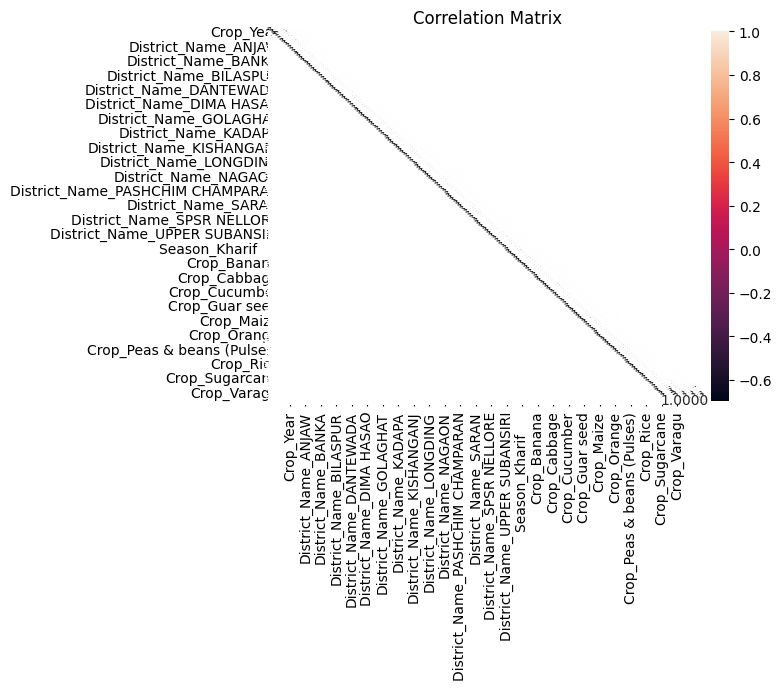

In [13]:
sns.heatmap(dummy.corr(), annot =True, fmt='.4f')
plt.title('Correlation Matrix')

In [14]:
dummy = pd.get_dummies(data)
dummy


,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield,District_Name_ANANTAPUR,District_Name_ANJAW,District_Name_ARARIA,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,36,35,45,1254.0,2000.0,1.594896,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2000,37,40,46,2.0,1.0,0.500000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000,36,41,50,102.0,321.0,3.147059,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2000,37,42,55,176.0,641.0,3.642045,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000,36,40,54,720.0,165.0,0.229167,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2006,36,35,45,27.0,7.0,0.259259,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49995,2006,37,40,46,27.0,32.0,1.185185,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49996,2006,36,41,50,450.0,213.0,0.473333,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49997,2006,37,42,55,1778.0,309.0,0.173791,False,False,False,...,False,False,False,False,True,False,False,False,False,False


<b><i> Splitting dataset into train and test dataset </i></b>

In [15]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (37499, 203)
x_test : (12500, 203)
y_train : (37499,)
y_test : (12500,)


In [16]:
print(x_train)
print(y_train)

       Crop_Year  Temperature  Humidity  Soil_Moisture     Area  \
27434       2009           36        40             54   2761.0   
13400       1999           36        35             45  57620.0   
883         2013           37        40             46    935.0   
7303        2004           36        40             54   9065.0   
49251       2005           36        35             45   7505.0   
...          ...          ...       ...            ...      ...   
11284       2002           35        50             59    130.0   
44732       2013           25        55             55     29.0   
38158       2010           37        42             55   2347.0   
860         2013           34        45             52      2.0   
15795       2009           37        40             46    767.0   

       District_Name_ANANTAPUR  District_Name_ANJAW  District_Name_ARARIA  \
27434                    False                False                  True   
13400                    False           

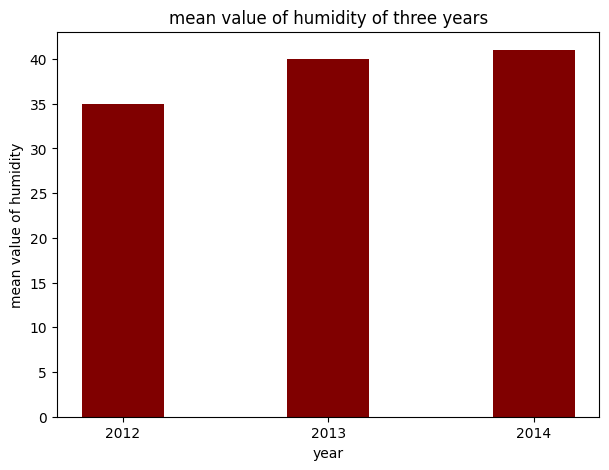

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# creating the dataset
year = [2012,2013,2014]
values = []
data1 = pd.DataFrame(crop_data)
for x in range(3):
  curyearsum=0
  count=0
  for y in range(1000):
    if(data1.iloc[y]["Crop_Year"] == year[x]):
      count+=1;
      curyearsum += data1.iloc[x]["Humidity"]
  values.append(curyearsum/count)
fig = plt.figure(figsize = (7, 5))

# creating the bar plot
x = np.array(["2012","2013","2014"])
y = np.array(values)
plt.xlabel("year")
plt.ylabel("mean value of humidity")
plt.title("mean value of humidity of three years")
plt.bar(x,y,color ='maroon', width = 0.4)
plt.show()

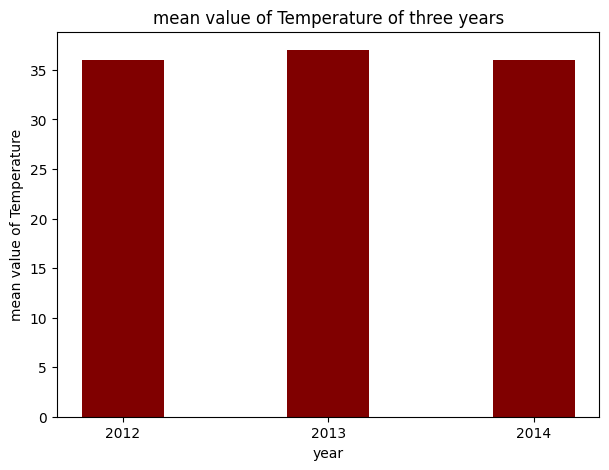

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# creating the dataset
year = [2012,2013,2014]
values = []
data1 = pd.DataFrame(crop_data)
for x in range(3):
  curyearsum=0
  count=0
  for y in range(1000):
    if(data1.iloc[y]["Crop_Year"] == year[x]):
      count+=1;
      curyearsum += data1.iloc[x]["Temperature"]
  values.append(curyearsum/count)
fig = plt.figure(figsize = (7, 5))

# creating the bar plot
x = np.array(["2012","2013","2014"])
y = np.array(values)
plt.xlabel("year")
plt.ylabel("mean value of Temperature")
plt.title("mean value of Temperature of three years")
plt.bar(x,y,color ='maroon', width = 0.4)
plt.show()

# **Linear Regression**

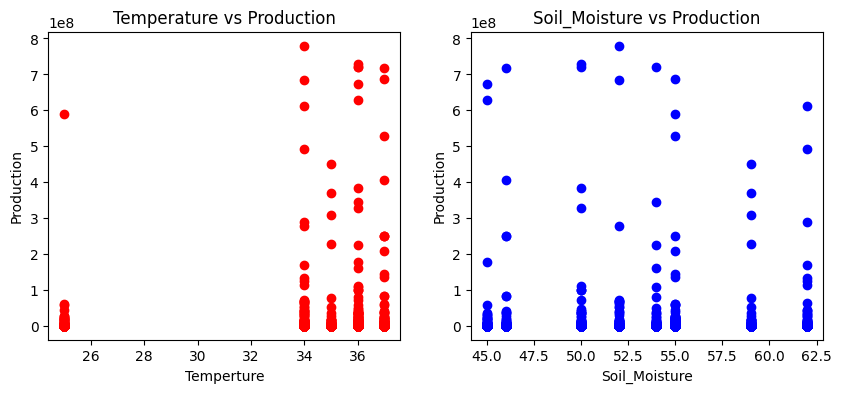

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(crop_data['Temperature'], crop_data['Production'], color='red')
axes[1].scatter(crop_data['Soil_Moisture'], crop_data['Production'], color='blue')
axes[0].set_title("Temperature vs Production")
axes[1].set_title("Soil_Moisture vs Production")
axes[0].set_ylabel("Production")
axes[0].set_xlabel("Temperture")
axes[1].set_ylabel("Production")
axes[1].set_xlabel("Soil_Moisture")
plt.show()

In [20]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
lr_predict = model.predict(x_test)
lr_predict

array([-101456.00378422, 5369388.50109821, -894968.13413082, ...,
        127368.26822253, -180332.29076773, -102797.33802973])

In [22]:
from sklearn.metrics import mean_squared_error
lr_predict = model.predict(x_test)
scores_regr = mean_squared_error(y_test, lr_predict)
print(scores_regr)
# print(mean_squared_error(y_train, lr_predict))

138865500658291.6


In [23]:
# Predicting the test Results

lr_predict = model.predict(x_test)
lr_predict

array([-101456.00378422, 5369388.50109821, -894968.13413082, ...,
        127368.26822253, -180332.29076773, -102797.33802973])

In [24]:
model.score(x_test,y_test)

0.1025004437809438

In [25]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.1025004437809438


Text(0.5, 1.0, 'Linear Regression')

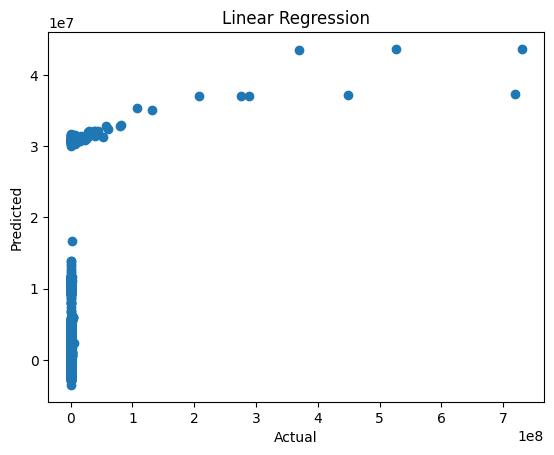

In [26]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.

<b> Assumptions of Linear Regression </b>
<ol>
    <li> Linearity.</li>
    <li> Homoscedasticity </li>
    <li> Multivariate normality </li>
    <li> Lack of multicollinearity </li>
    


R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination.
This tells us how well the unknown samples will be predicted by our model.

# <b> Decision Tree </b>

In [27]:
# Training model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([2042.,  136.,   16., ...,  242., 1000.,  560.])

In [28]:
regressor.score(x_test,y_test)

0.8677786550410754

Text(0.5, 1.0, 'Decision Tree ')

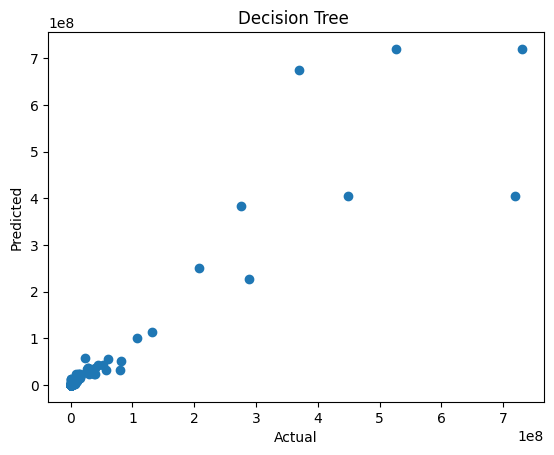

In [29]:
plt.scatter(y_test,decisiontree_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree ')

In [30]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.8677786550410754


In [31]:
# Calculating Adj. R2 score:

Adjr2_2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.8655957554780743


/tmp/ipython-input-697514152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-697514152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(decisiontree_predict, hist = False, color = "b", la

Text(0.5, 1.0, 'Decision Tree Regression')

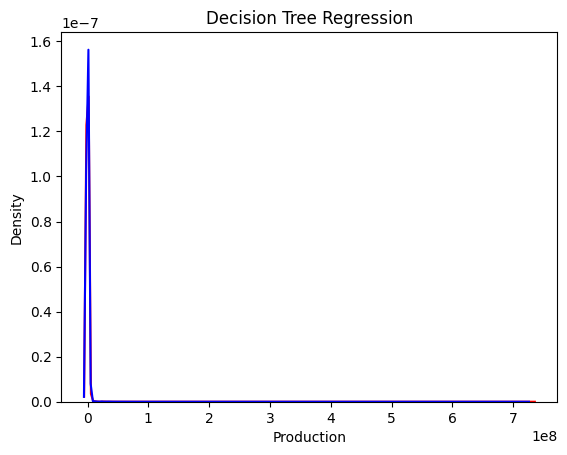

In [32]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

# **Random Forest Algorithm**

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([3416.27272727,  167.54545455,   22.72727273, ...,  348.90909091,
        902.63636364,  618.18181818])

In [34]:
model.score(x_test,y_test)

0.8725861095182716

In [35]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.8725861095182716


In [36]:
# Calculating Adj. R2 score:

Adjr2_1 = 1 - (1-r1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.8704825783074884


/tmp/ipython-input-551929062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-551929062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_predict, hist = False, color = "b", label = "Pre

Text(0.5, 1.0, 'Random Forest Regression')

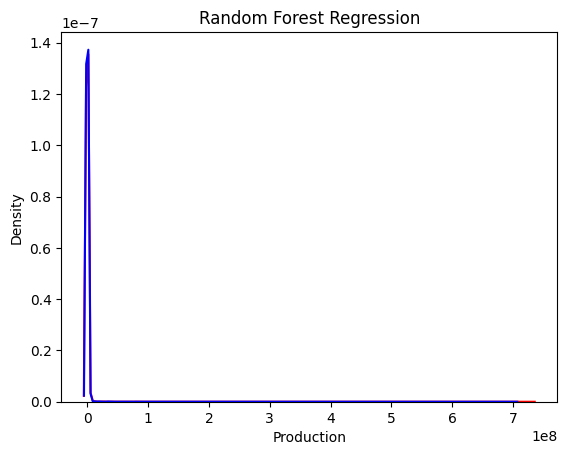

In [37]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

Text(0.5, 1.0, 'Random Forest')

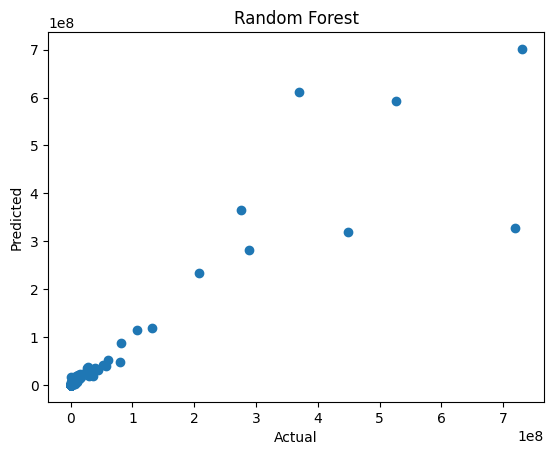

In [38]:
plt.scatter(y_test,rf_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b>



1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

# <b> Support Vector Regression </b>

In [39]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [40]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
regr.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [41]:
svr_predict = regr.predict(x_test)
svr_predict

array([672.63713137, 701.31935866, 581.99252034, ..., 618.46875558,
       627.43040287, 602.36562132])

In [42]:
print(regr.score(x_test,y_test))

-0.001093144343699226


In [43]:
from sklearn.metrics import r2_score
r3 = r2_score(y_test,svr_predict)
print(r3)

-0.001093144343699226


In [44]:
# Calculating Adj. R2 score:

Adjr2_3 = 1 - (1-r3)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_3))

Adj. R-Squared : -0.017620625500317066


/tmp/ipython-input-2646629236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-2646629236.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(svr_predict, hist = False, color = "b", label = "

Text(0.5, 1.0, 'Support Vector Regression')

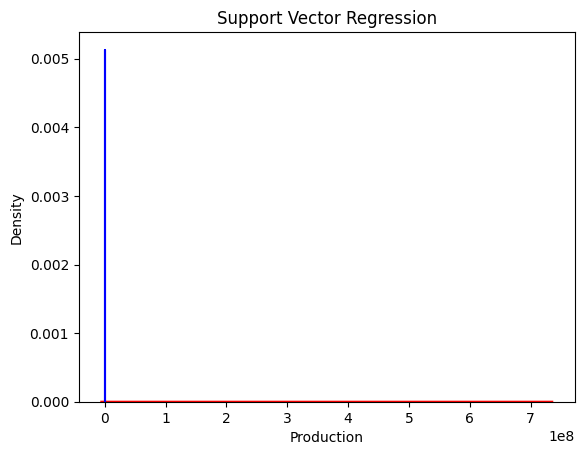

In [45]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(svr_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Support Vector Regression')

# <b> Cross-validation </b>

Random Forest

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y=y_train, cv = 10)
accuracies

array([0.89701302, 0.99109974, 0.85450296, 0.97988251, 0.99352725,
       0.95694799, 0.97982714, 0.8598166 , 0.95862462, 0.93384957])

In [47]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [48]:

# Mean Accuracy and SD of 10 fold results

print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 94.05%
Standard Deviation : 4.99%


Decision Tree


In [49]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train, cv = 10)

In [50]:
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)

In [51]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 92.58%
Standard Deviation : 5.32%


Support Vector Regressor

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train, cv = 10)

In [53]:
a3 = (accuracies.mean()*100)
b3 = (accuracies.std()*100)

In [54]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 92.58%
Standard Deviation : 5.32%


Comparing with Graphs


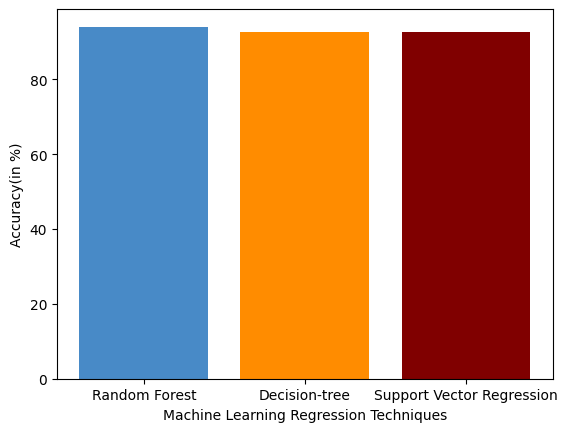

In [55]:
# Mean Accuracy
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree', 'Support Vector Regression']
Accuracy = [a1, a2, a3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00', '#800000'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

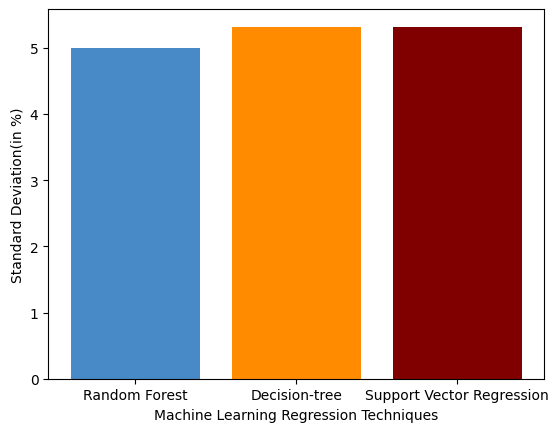

<Figure size 640x480 with 0 Axes>

In [56]:
# Standard Deviation
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree', 'Support Vector Regression']
Accuracy = [b1, b2, b3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00', '#800000'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

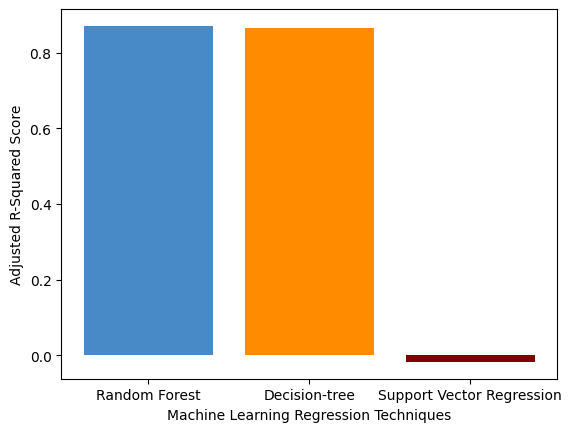

<Figure size 640x480 with 0 Axes>

In [57]:
# Adjusted R2 value
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree', 'Support Vector Regression']
Accuracy = [Adjr2_1, Adjr2_2, Adjr2_3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00', '#800000'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Adjusted R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

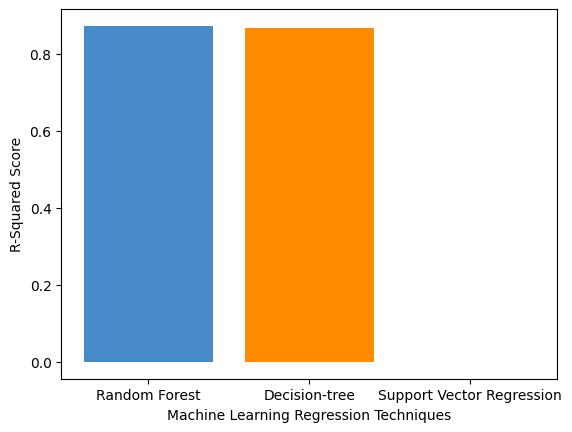

<Figure size 640x480 with 0 Axes>

In [58]:
# R2 Score
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree', 'Support Vector Regression']
Accuracy = [r1, r2, r3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00', '#800000'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

In [59]:
!pip install joblib



In [60]:
import joblib

joblib.dump(model, "crop_model.pkl")


['crop_model.pkl']

In [61]:
from google.colab import files
files.download("crop_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00


In [63]:
feature_columns = dummy.drop(["Production", "Yield"], axis=1).columns


In [64]:
print("Number of features:", len(feature_columns))


Number of features: 203


In [65]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd


In [77]:
# Numeric inputs
year_input = widgets.IntText(value=2010, description='Crop Year')
temp_input = widgets.FloatSlider(value=30, min=0, max=50, description='Temperature (°C)')
humidity_input = widgets.FloatSlider(value=60, min=0, max=100, description='Humidity (%)')
soil_input = widgets.FloatSlider(value=50, min=0, max=100, description='Soil Moisture')
area_input = widgets.FloatText(value=1000, description='Area (ha)')

# Dropdowns (adjust options based on your dataset)
district_list = list(crop_data['District_Name'].unique())
district_input = widgets.Dropdown(
    options=district_list,
    description='District'
)

season_input = widgets.Dropdown(
    options=['Kharif', 'Rabi', 'Whole Year'],
    description='Season'
)

crop_input = widgets.Dropdown(
    options=['Rice', 'Wheat', 'Maize'],
    description='Crop'
)

predict_button = widgets.Button(description="Predict Yield", button_style='success')
output = widgets.Output()


In [78]:
def predict_crop(b):
    with output:
        clear_output(wait=True)
        print("⏳ Running prediction...")

        try:
            single_prediction_input = pd.DataFrame(0, index=[0], columns=feature_columns)

            single_prediction_input['Crop_Year'] = year_input.value
            single_prediction_input['Temperature'] = temp_input.value
            single_prediction_input['Humidity'] = humidity_input.value
            single_prediction_input['Soil_Moisture'] = soil_input.value
            single_prediction_input['Area'] = area_input.value

            district_col = f"District_Name_{district_input.value}"
            if district_col in feature_columns:
                single_prediction_input[district_col] = 1

            season_col = f"Season_{season_input.value}"
            if season_col in feature_columns:
                single_prediction_input[season_col] = 1

            crop_col = f"Crop_{crop_input.value}"
            if crop_col in feature_columns:
                single_prediction_input[crop_col] = 1

            single_prediction_input = single_prediction_input[feature_columns]

            prediction = model.predict(single_prediction_input)

            print("🌾 Crop Yield Prediction")
            print("------------------------")
            print(f"Predicted Production: {prediction[0]:.2f} tonnes")

        except Exception as e:
            print("❌ Error occurred:")
            print(e)


In [79]:

predict_button.on_click(predict_crop)


In [80]:
display(
    year_input,
    temp_input,
    humidity_input,
    soil_input,
    area_input,
    district_input,
    season_input,
    crop_input,
    predict_button,
    output
)


IntText(value=2010, description='Crop Year')

FloatSlider(value=30.0, description='Temperature (°C)', max=50.0)

FloatSlider(value=60.0, description='Humidity (%)')

FloatSlider(value=50.0, description='Soil Moisture')

FloatText(value=1000.0, description='Area (ha)')

Dropdown(description='District', options=('NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS', 'ANANTAPUR…

Dropdown(description='Season', options=('Kharif', 'Rabi', 'Whole Year'), value='Kharif')

Dropdown(description='Crop', options=('Rice', 'Wheat', 'Maize'), value='Rice')

Button(button_style='success', description='Predict Yield', style=ButtonStyle())

Output()

# Task
Initialize a state dropdown with unique state names from `crop_data` and dynamically update the district dropdown's options based on the selected state, then update the display to include this new functionality.

## Add State Selector and Initialize District

### Subtask:
Introduce a new `widgets.Dropdown` for 'State_Name', populating its options with unique state names from `crop_data`. Initialize the `district_input` dropdown to display districts corresponding to the initial selected state.


**Reasoning**:
First, I'll create the `state_input` dropdown with unique state names from `crop_data`. Then, I'll get the initial selected state from this dropdown and use it to filter `crop_data` to populate the `district_input` dropdown with relevant districts. I will also make sure to use `crop_data` instead of `data` as the former contains `State_Name` column.



In [81]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# Numeric inputs
year_input = widgets.IntText(value=2010, description='Crop Year')
temp_input = widgets.FloatSlider(value=30, min=0, max=50, description='Temperature (°C)')
humidity_input = widgets.FloatSlider(value=60, min=0, max=100, description='Humidity (%)')
soil_input = widgets.FloatSlider(value=50, min=0, max=100, description='Soil Moisture')
area_input = widgets.FloatText(value=1000, description='Area (ha)')

# Dropdowns
state_list = sorted(crop_data['State_Name'].unique().tolist())
state_input = widgets.Dropdown(
    options=state_list,
    description='State'
)

# Initialize district_input based on the initial state_input value
initial_state = state_input.value
initial_districts = sorted(crop_data[crop_data['State_Name'] == initial_state]['District_Name'].unique().tolist())
district_input = widgets.Dropdown(
    options=initial_districts,
    description='District'
)

season_input = widgets.Dropdown(
    options=['Kharif', 'Rabi', 'Whole Year'],
    description='Season'
)

crop_input = widgets.Dropdown(
    options=sorted(crop_data['Crop'].unique().tolist()), # Populate all unique crops
    description='Crop'
)

predict_button = widgets.Button(description="Predict Yield", button_style='success')
output = widgets.Output()

## Implement State-District Linkage

### Subtask:
Create an `observe` function that listens for changes in the 'State' dropdown. When a state is selected, this function will filter the `crop_data` DataFrame to find all unique districts within that state and dynamically update the 'District' dropdown's options to show only those relevant districts.


**Reasoning**:
To dynamically update the district dropdown based on the selected state, I will define an `update_district_options` function that filters districts from `crop_data` based on the new state value and assigns them to the `district_input` options. This function will then be registered as an observer for changes in the `state_input` widget.



In [82]:
def update_district_options(change):
    selected_state = change['new']
    # Filter districts based on the selected state
    new_districts = sorted(crop_data[crop_data['State_Name'] == selected_state]['District_Name'].unique().tolist())
    # Update the options of the district_input dropdown
    district_input.options = new_districts

# Attach the update_district_options function to observe changes in state_input
state_input.observe(update_district_options, names='value')

# Display the widgets (re-displaying them to reflect changes if already displayed)
display(
    year_input,
    temp_input,
    humidity_input,
    soil_input,
    area_input,
    state_input, # Ensure state_input is displayed
    district_input,
    season_input,
    crop_input,
    predict_button,
    output
)

IntText(value=2010, description='Crop Year')

FloatSlider(value=30.0, description='Temperature (°C)', max=50.0)

FloatSlider(value=60.0, description='Humidity (%)')

FloatSlider(value=50.0, description='Soil Moisture')

FloatText(value=1000.0, description='Area (ha)')

Dropdown(description='State', options=('Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', '…

Dropdown(description='District', options=('NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS'), value='NI…

Dropdown(description='Season', options=('Kharif', 'Rabi', 'Whole Year'), value='Kharif')

Dropdown(description='Crop', options=('Arecanut', 'Arhar/Tur', 'Bajra', 'Banana', 'Barley', 'Beans & Mutter(Ve…

Button(button_style='success', description='Predict Yield', style=ButtonStyle())

Output()